In [16]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.precision',2)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
#import cufflinks as cf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl


### Loading Dataset 

for the data visualization we selected the reports:


In [17]:
d = pd.read_csv("/content/diabetes.csv")


In [ ]:
print(f" the shape of dataset is: {d.shape}")

 the shape of dataset is: (768, 9)


In [ ]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**List of Features & Their Unique Values**

In [ ]:
d.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

**all variables are float and int and we don't have any nominal variable**

### Data Preperation and Imputation



####Missing Values

In [18]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**In this dataset there isnot any missing data.**

In [ ]:
d[d=='..'].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
d[d=='?'].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
d[d=='unknown'].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

**the missing values fill with 0 so we can fill them by mean since it can have the better performance in visualization**

In [5]:
#d[d==0]=np.nan

In [6]:
#d.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
# for i in d.columns:
#   d[i]=d[i].fillna(d[i].mean())

In [19]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Visualization Techniques

#### Checking the distribution and Correlation Among Variables

<Figure size 864x576 with 0 Axes>

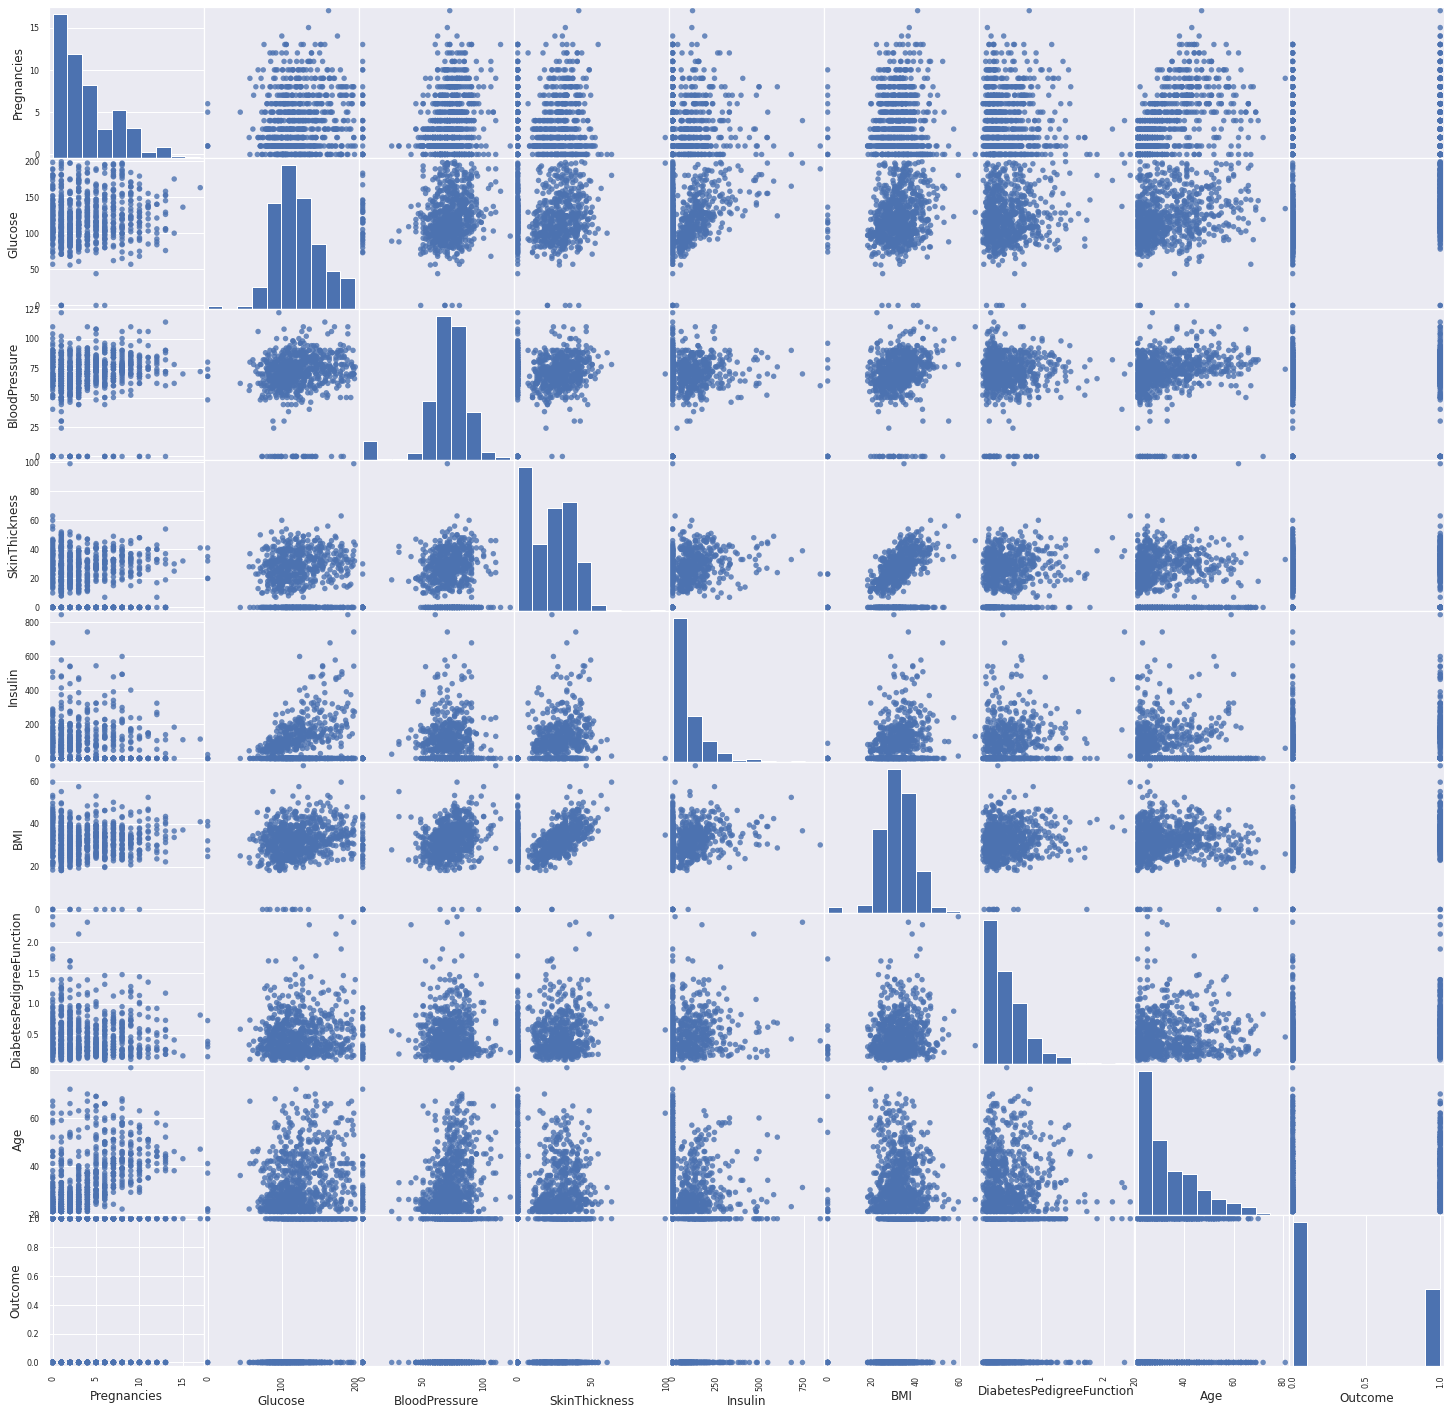

In [ ]:

plt.figure()
pd.plotting.scatter_matrix(d, figsize=(25, 25), marker='o', hist_kwds={'bins': 10}, s = 30, alpha = 0.8)
plt.show()

#### Scaling and Normalizing the Dataset

Since the distribution of our dataset for some vairable or features is skewed we are performing min-max scaling (similar to normalization) and shift methods to see its impacts


In [20]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
dnorm = ss.fit_transform(d)
dnorm = pd.DataFrame(dnorm, columns=d.columns)
dnorm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.35,0.74,0.59,0.35,0.00,0.50,0.23,0.48,1.0
1,0.06,0.43,0.54,0.29,0.00,0.40,0.12,0.17,0.0
2,0.47,0.92,0.52,0.00,0.00,0.35,0.25,0.18,1.0
3,0.06,0.45,0.54,0.23,0.11,0.42,0.04,0.00,0.0
4,0.00,0.69,0.33,0.35,0.20,0.64,0.94,0.20,1.0


#### Checking Correlation after Scaling

**Plot Selection 1:Correlation Matrix for selecting variables**

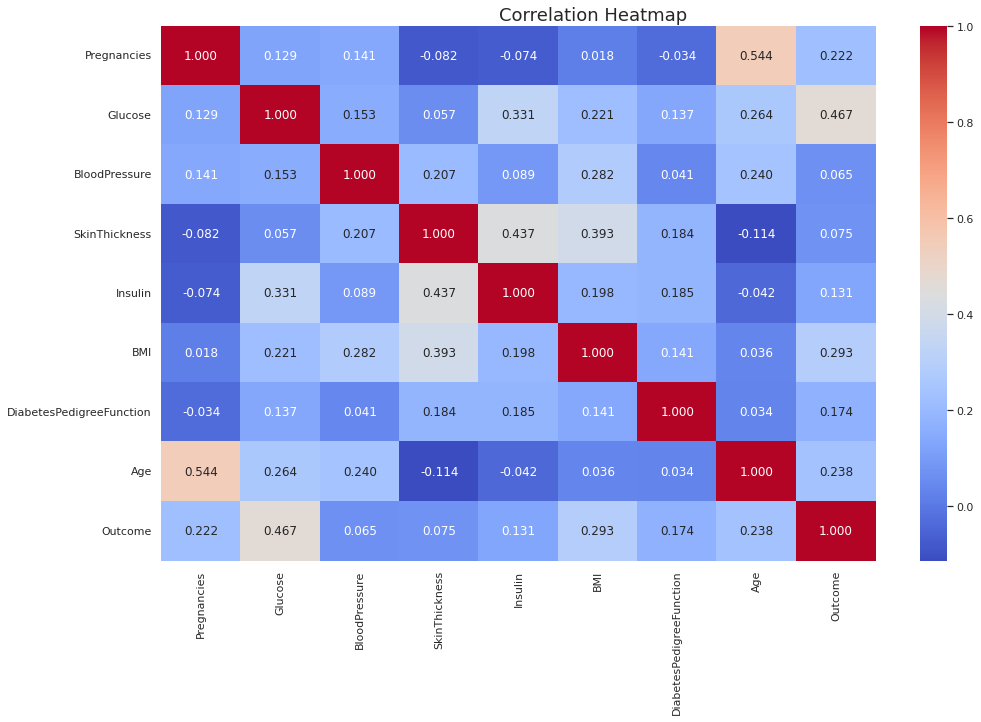

In [21]:
 #corrolation heatmap 
fig, ax = plt.subplots(figsize=(16, 9))
corr = dnorm.corr()
htmap = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",fmt='.3f')
fig.subplots_adjust(top=0.95)
f= fig.suptitle('Correlation Heatmap', fontsize=18)

**Plot Selection 2 - Interactive  pie Plot for diabetes**

In [22]:
diabetes=dnorm['Outcome'].value_counts()
b1=['non-diabetic','diabetic']
fig = px.pie(values=diabetes, names=b1, title="Comparing the number of people suffering from diabetes",color=diabetes.index )

fig.show()

**Plot Selection 3 - Intractive  3d Scatter Plot with Size and Color**

In [23]:
#preparing data for plotly
b=['non-diabetic','diabetic']
data1 = px.scatter_3d(dnorm, x='BMI',y='Pregnancies',z='Outcome',color='Age',
    size='Glucose',
    title='The Reason Behind Diabetes',
    size_max=50,
    )
    
data = data1
layout = go.Layout(
    title='The Reason Behind Diabetes',
    scene=dict(
        xaxis=dict(
            title='Glucose'
        ),
        yaxis=dict(
            title='Pregnancies'
        ),
        zaxis=dict(
            title='Diabetes'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

**Plot Selection 4:Intractive bar Plot for diabetes**

In [ ]:
fig = px.bar( dnorm,x='Glucose', y='Insulin',
             color='Outcome',  barmode = 'overlay',title="relationship between Glucose and Insulin in diabetic and non-diabetic persons ")
fig.show()


**Plot Selection 5:Intractive  bar Plot for diabetes**

In [ ]:
df=d.groupby(['Outcome']).agg({'Age':np.mean, 'Pregnancies':np.mean})
b=['non-diabetic','diabetic']


fig = px.bar(df,x=b, y='Age' ,color='Pregnancies', labels=dict(x="diabetes",
                y="Age"),text_auto=True, title="Realatonship between age and pregnancies with diabetes")
fig.show()


**Plot Selection 6:Interactive  2-d scatter Plot with color and size for diabetes**

In [ ]:
fig=px.scatter( dnorm, x='Glucose',y='DiabetesPedigreeFunction',color='Outcome', 
               size="Pregnancies",title='Relationship between Glucose,DiabetesPedigreeFunction, Pregnancies in diabetic and non-diabetic people',size_max=10)
fig.show()
   